<a href="https://colab.research.google.com/github/Pravin-P-Singh/practice/blob/main/Practical_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Family Tree Prolog

In [ ]:
Prolog rules and facts goes below
male(jack).
male(oliver).
male(ali).
male(james).
male(simon).
male(harry).
female(helen).
female(sophie).
female(jess).
female(lily).
parent_of(jack, jess).
parent_of(jack, lily).
parent_of(helen, jess).
parent_of(helen, lily).
parent_of(oliver, james).
parent_of(sophie, james).
parent_of(jess, simon).
parent_of(ali, simon).
parent_of(lily, harry).
parent_of(james, harry).
father_of(X, Y) :-
 male(X),
 parent_of(X, Y).
mother_of(X, Y) :-
 female(X),
 parent_of(X, Y).
grandfather_of(X, Y) :-
 male(X),
 parent_of(X, Z),
 parent_of(Z, Y).
grandmother_of(X, Y) :-
 female(X),
 parent_of(X, Z),
 parent_of(Z, Y).
sister_of(X, Y) :-
 female(X),
 parent_of(F, Y),
 parent_of(F, X),
 X \= Y.
brother_of(X, Y) :-
 male(X),
 parent_of(F, Y),
 parent_of(F, X),
 X \= Y.
aunt_of(X, Y) :-
 female(X),
 parent_of(Z, Y),
 sister_of(Z, X).
uncle_of(X, Y) :-
 parent_of(Z, Y),
 brother_of(Z, X).
ancestor_of(X, Y) :-
 parent_of(X, Y).
ancestor_of(X, Y) :-
 parent_of(X, Z),
 ancestor_of(Z, Y).
% Predicate to print the family tree
print_family_tree(Person) :-
 write('Family tree for '), write(Person), write(':'), nl,
 print_family_tree_helper(Person, 0).
print_family_tree_helper(Person, Tabs) :-
 Tabs >= 0,
 format('~*c', [Tabs, 32]), % 32 is ASCII code for space
 write(Person), nl,
 ( father_of(Person, Child) ;
 mother_of(Person, Child)
 ),
 NextTabs is Tabs + 4,
 print_family_tree_helper(Child, NextTabs).



 Prolog query goes here

 grandmother_of(X,harry)


 Run this on swish prolog website

#Best First Search

In [ ]:
from queue import PriorityQueue
v = 14
graph = [[] for i in range(v)]

# Function For Implementing Best First Search
# Gives output path having lowest cost


def best_first_search(actual_Src, target, n):
	visited = [False] * n
	pq = PriorityQueue()
	pq.put((0, actual_Src))
	visited[actual_Src] = True

	while pq.empty() == False:
		u = pq.get()[1]
		# Displaying the path having lowest cost
		print(u, end=" ")
		if u == target:
			break

		for v, c in graph[u]:
			if visited[v] == False:
				visited[v] = True
				pq.put((c, v))
	print()

# Function for adding edges to graph


def addedge(x, y, cost):
	graph[x].append((y, cost))
	graph[y].append((x, cost))


# The nodes shown in above example(by alphabets) are
# implemented using integers addedge(x,y,cost);
addedge(0, 1, 3)
addedge(0, 2, 6)
addedge(0, 3, 5)
addedge(1, 4, 9)
addedge(1, 5, 8)
addedge(2, 6, 12)
addedge(2, 7, 14)
addedge(3, 8, 7)
addedge(8, 9, 5)
addedge(8, 10, 6)
addedge(9, 11, 1)
addedge(9, 12, 10)
addedge(9, 13, 2)

source = 0
target = 9
best_first_search(source, target, v)


0 1 3 2 8 9 


#A* search algorithm

In [ ]:
import math
import heapq

# Define the Cell class
class Cell:
	def __init__(self):
		self.parent_i = 0 # Parent cell's row index
		self.parent_j = 0 # Parent cell's column index
		self.f = float('inf') # Total cost of the cell (g + h)
		self.g = float('inf') # Cost from start to this cell
		self.h = 0 # Heuristic cost from this cell to destination

# Define the size of the grid
ROW = 9
COL = 10

# Check if a cell is valid (within the grid)
def is_valid(row, col):
	return (row >= 0) and (row < ROW) and (col >= 0) and (col < COL)

# Check if a cell is unblocked
def is_unblocked(grid, row, col):
	return grid[row][col] == 1

# Check if a cell is the destination
def is_destination(row, col, dest):
	return row == dest[0] and col == dest[1]

# Calculate the heuristic value of a cell (Euclidean distance to destination)
def calculate_h_value(row, col, dest):
	return ((row - dest[0]) ** 2 + (col - dest[1]) ** 2) ** 0.5

# Trace the path from source to destination
def trace_path(cell_details, dest):
	print("The Path is ")
	path = []
	row = dest[0]
	col = dest[1]

	# Trace the path from destination to source using parent cells
	while not (cell_details[row][col].parent_i == row and cell_details[row][col].parent_j == col):
		path.append((row, col))
		temp_row = cell_details[row][col].parent_i
		temp_col = cell_details[row][col].parent_j
		row = temp_row
		col = temp_col

	# Add the source cell to the path
	path.append((row, col))
	# Reverse the path to get the path from source to destination
	path.reverse()

	# Print the path
	for i in path:
		print("->", i, end=" ")
	print()

# Implement the A* search algorithm
def a_star_search(grid, src, dest):
	# Check if the source and destination are valid
	if not is_valid(src[0], src[1]) or not is_valid(dest[0], dest[1]):
		print("Source or destination is invalid")
		return

	# Check if the source and destination are unblocked
	if not is_unblocked(grid, src[0], src[1]) or not is_unblocked(grid, dest[0], dest[1]):
		print("Source or the destination is blocked")
		return

	# Check if we are already at the destination
	if is_destination(src[0], src[1], dest):
		print("We are already at the destination")
		return

	# Initialize the closed list (visited cells)
	closed_list = [[False for _ in range(COL)] for _ in range(ROW)]
	# Initialize the details of each cell
	cell_details = [[Cell() for _ in range(COL)] for _ in range(ROW)]

	# Initialize the start cell details
	i = src[0]
	j = src[1]
	cell_details[i][j].f = 0
	cell_details[i][j].g = 0
	cell_details[i][j].h = 0
	cell_details[i][j].parent_i = i
	cell_details[i][j].parent_j = j

	# Initialize the open list (cells to be visited) with the start cell
	open_list = []
	heapq.heappush(open_list, (0.0, i, j))

	# Initialize the flag for whether destination is found
	found_dest = False

	# Main loop of A* search algorithm
	while len(open_list) > 0:
		# Pop the cell with the smallest f value from the open list
		p = heapq.heappop(open_list)

		# Mark the cell as visited
		i = p[1]
		j = p[2]
		closed_list[i][j] = True

		# For each direction, check the successors
		directions = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
		for dir in directions:
			new_i = i + dir[0]
			new_j = j + dir[1]

			# If the successor is valid, unblocked, and not visited
			if is_valid(new_i, new_j) and is_unblocked(grid, new_i, new_j) and not closed_list[new_i][new_j]:
				# If the successor is the destination
				if is_destination(new_i, new_j, dest):
					# Set the parent of the destination cell
					cell_details[new_i][new_j].parent_i = i
					cell_details[new_i][new_j].parent_j = j
					print("The destination cell is found")
					# Trace and print the path from source to destination
					trace_path(cell_details, dest)
					found_dest = True
					return
				else:
					# Calculate the new f, g, and h values
					g_new = cell_details[i][j].g + 1.0
					h_new = calculate_h_value(new_i, new_j, dest)
					f_new = g_new + h_new

					# If the cell is not in the open list or the new f value is smaller
					if cell_details[new_i][new_j].f == float('inf') or cell_details[new_i][new_j].f > f_new:
						# Add the cell to the open list
						heapq.heappush(open_list, (f_new, new_i, new_j))
						# Update the cell details
						cell_details[new_i][new_j].f = f_new
						cell_details[new_i][new_j].g = g_new
						cell_details[new_i][new_j].h = h_new
						cell_details[new_i][new_j].parent_i = i
						cell_details[new_i][new_j].parent_j = j

	# If the destination is not found after visiting all cells
	if not found_dest:
		print("Failed to find the destination cell")

def main():
	# Define the grid (1 for unblocked, 0 for blocked)
	grid = [
		[1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
		[1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
		[1, 1, 1, 0, 1, 1, 0, 1, 0, 1],
		[0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
		[1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
		[1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
		[1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
		[1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
		[1, 1, 1, 0, 0, 0, 1, 0, 0, 1]
	]

	# Define the source and destination
	src = [8, 0]
	dest = [0, 0]

	# Run the A* search algorithm
	a_star_search(grid, src, dest)

if __name__ == "__main__":
	main()


The destination cell is found
The Path is 
-> (8, 0) -> (7, 0) -> (6, 0) -> (5, 0) -> (4, 1) -> (3, 2) -> (2, 1) -> (1, 0) -> (0, 0) 


#8 puzzle problem

In [ ]:
# Python3 program to print the path from root
# node to destination node for N*N-1 puzzle
# algorithm using Branch and Bound
# The solution assumes that instance of
# puzzle is solvable

# Importing copy for deepcopy function
import copy

# Importing the heap functions from python
# library for Priority Queue
from heapq import heappush, heappop

# This variable can be changed to change
# the program from 8 puzzle(n=3) to 15
# puzzle(n=4) to 24 puzzle(n=5)...
n = 3

# bottom, left, top, right
row = [ 1, 0, -1, 0 ]
col = [ 0, -1, 0, 1 ]

# A class for Priority Queue
class priorityQueue:

	# Constructor to initialize a
	# Priority Queue
	def __init__(self):
		self.heap = []

	# Inserts a new key 'k'
	def push(self, k):
		heappush(self.heap, k)

	# Method to remove minimum element
	# from Priority Queue
	def pop(self):
		return heappop(self.heap)

	# Method to know if the Queue is empty
	def empty(self):
		if not self.heap:
			return True
		else:
			return False

# Node structure
class node:

	def __init__(self, parent, mat, empty_tile_pos,
				cost, level):

		# Stores the parent node of the
		# current node helps in tracing
		# path when the answer is found
		self.parent = parent

		# Stores the matrix
		self.mat = mat

		# Stores the position at which the
		# empty space tile exists in the matrix
		self.empty_tile_pos = empty_tile_pos

		# Stores the number of misplaced tiles
		self.cost = cost

		# Stores the number of moves so far
		self.level = level

	# This method is defined so that the
	# priority queue is formed based on
	# the cost variable of the objects
	def __lt__(self, nxt):
		return self.cost < nxt.cost

# Function to calculate the number of
# misplaced tiles ie. number of non-blank
# tiles not in their goal position
def calculateCost(mat, final) -> int:

	count = 0
	for i in range(n):
		for j in range(n):
			if ((mat[i][j]) and
				(mat[i][j] != final[i][j])):
				count += 1

	return count

def newNode(mat, empty_tile_pos, new_empty_tile_pos,
			level, parent, final) -> node:

	# Copy data from parent matrix to current matrix
	new_mat = copy.deepcopy(mat)

	# Move tile by 1 position
	x1 = empty_tile_pos[0]
	y1 = empty_tile_pos[1]
	x2 = new_empty_tile_pos[0]
	y2 = new_empty_tile_pos[1]
	new_mat[x1][y1], new_mat[x2][y2] = new_mat[x2][y2], new_mat[x1][y1]

	# Set number of misplaced tiles
	cost = calculateCost(new_mat, final)

	new_node = node(parent, new_mat, new_empty_tile_pos,
					cost, level)
	return new_node

# Function to print the N x N matrix
def printMatrix(mat):

	for i in range(n):
		for j in range(n):
			print("%d " % (mat[i][j]), end = " ")

		print()

# Function to check if (x, y) is a valid
# matrix coordinate
def isSafe(x, y):

	return x >= 0 and x < n and y >= 0 and y < n

# Print path from root node to destination node
def printPath(root):

	if root == None:
		return

	printPath(root.parent)
	printMatrix(root.mat)
	print()

# Function to solve N*N - 1 puzzle algorithm
# using Branch and Bound. empty_tile_pos is
# the blank tile position in the initial state.
def solve(initial, empty_tile_pos, final):

	# Create a priority queue to store live
	# nodes of search tree
	pq = priorityQueue()

	# Create the root node
	cost = calculateCost(initial, final)
	root = node(None, initial,
				empty_tile_pos, cost, 0)

	# Add root to list of live nodes
	pq.push(root)

	# Finds a live node with least cost,
	# add its children to list of live
	# nodes and finally deletes it from
	# the list.
	while not pq.empty():

		# Find a live node with least estimated
		# cost and delete it from the list of
		# live nodes
		minimum = pq.pop()

		# If minimum is the answer node
		if minimum.cost == 0:

			# Print the path from root to
			# destination;
			printPath(minimum)
			return

		# Generate all possible children
		for i in range(4):
			new_tile_pos = [
				minimum.empty_tile_pos[0] + row[i],
				minimum.empty_tile_pos[1] + col[i], ]

			if isSafe(new_tile_pos[0], new_tile_pos[1]):

				# Create a child node
				child = newNode(minimum.mat,
								minimum.empty_tile_pos,
								new_tile_pos,
								minimum.level + 1,
								minimum, final,)

				# Add child to list of live nodes
				pq.push(child)

# Driver Code

# Initial configuration
# Value 0 is used for empty space
initial = [ [ 1, 2, 3 ],
			[ 5, 6, 0 ],
			[ 7, 8, 4 ] ]

# Solvable Final configuration
# Value 0 is used for empty space
final = [ [ 1, 2, 3 ],
		[ 5, 8, 6 ],
		[ 0, 7, 4 ] ]

# Blank tile coordinates in
# initial configuration
empty_tile_pos = [ 1, 2 ]

# Function call to solve the puzzle
solve(initial, empty_tile_pos, final)


1  2  3  
5  6  0  
7  8  4  

1  2  3  
5  0  6  
7  8  4  

1  2  3  
5  8  6  
7  0  4  

1  2  3  
5  8  6  
0  7  4  



#Tower of Hanoi

#Theory for tower of Hanoi

Tower of Hanoi is a mathematical puzzle where we have three rods (A, B, and C) and N disks. Initially, all the disks are stacked in decreasing value of diameter i.e., the smallest disk is placed on the top and they are on rod A. The objective of the puzzle is to move the entire stack to another rod (here considered C), obeying the following simple rules:

Only one disk can be moved at a time.
Each move consists of taking the upper disk from one of the stacks and placing it on top of another stack i.e. a disk can only be moved if it is the uppermost disk on a stack.
No disk may be placed on top of a smaller disk.

In [ ]:
# Recursive Python function to solve tower of hanoi


def TowerOfHanoi(n, from_rod, to_rod, aux_rod):
	if n == 0:
		return
	TowerOfHanoi(n-1, from_rod, aux_rod, to_rod)
	print("Move disk", n, "from rod", from_rod, "to rod", to_rod)
	TowerOfHanoi(n-1, aux_rod, to_rod, from_rod)


# Driver code
N = 3

# A, C, B are the name of rods
TowerOfHanoi(N, 'A', 'C', 'B')

# Contributed By Harshit Agrawal


Move disk 1 from rod A to rod C
Move disk 2 from rod A to rod B
Move disk 1 from rod C to rod B
Move disk 3 from rod A to rod C
Move disk 1 from rod B to rod A
Move disk 2 from rod B to rod C
Move disk 1 from rod A to rod C


#ADL script for spare tyre problem
Consider the problem of changing a flat tire. More precisely, the goal is to have a good-spare tire properly mounted onto the car's axle where the initial state has a flat tire on the axle and a good spare tire in the trunk) To keep it simple, our version of the problem is a very abstract one, with no sticky lug nuts or other complications. There are just four actions: removing the spare from the trunk, removing the flat tire from the axle, putting the spare on the axle, and leaving the car unattended overnight. We assume that the car is in a particularly bad neighbourhood, so that the effect of leaving it overnight is that the tires disappear.
The ADL description of the problem is shown in Figure 6.3. Notice that it is purely prepositional. It goes beyond strips in that it uses a negated precondition, At(Flat, Axle), for the PutOn(Spare, Axle) action. This could be avoided by using Clear(Axle) instead, as we will see in the next example.

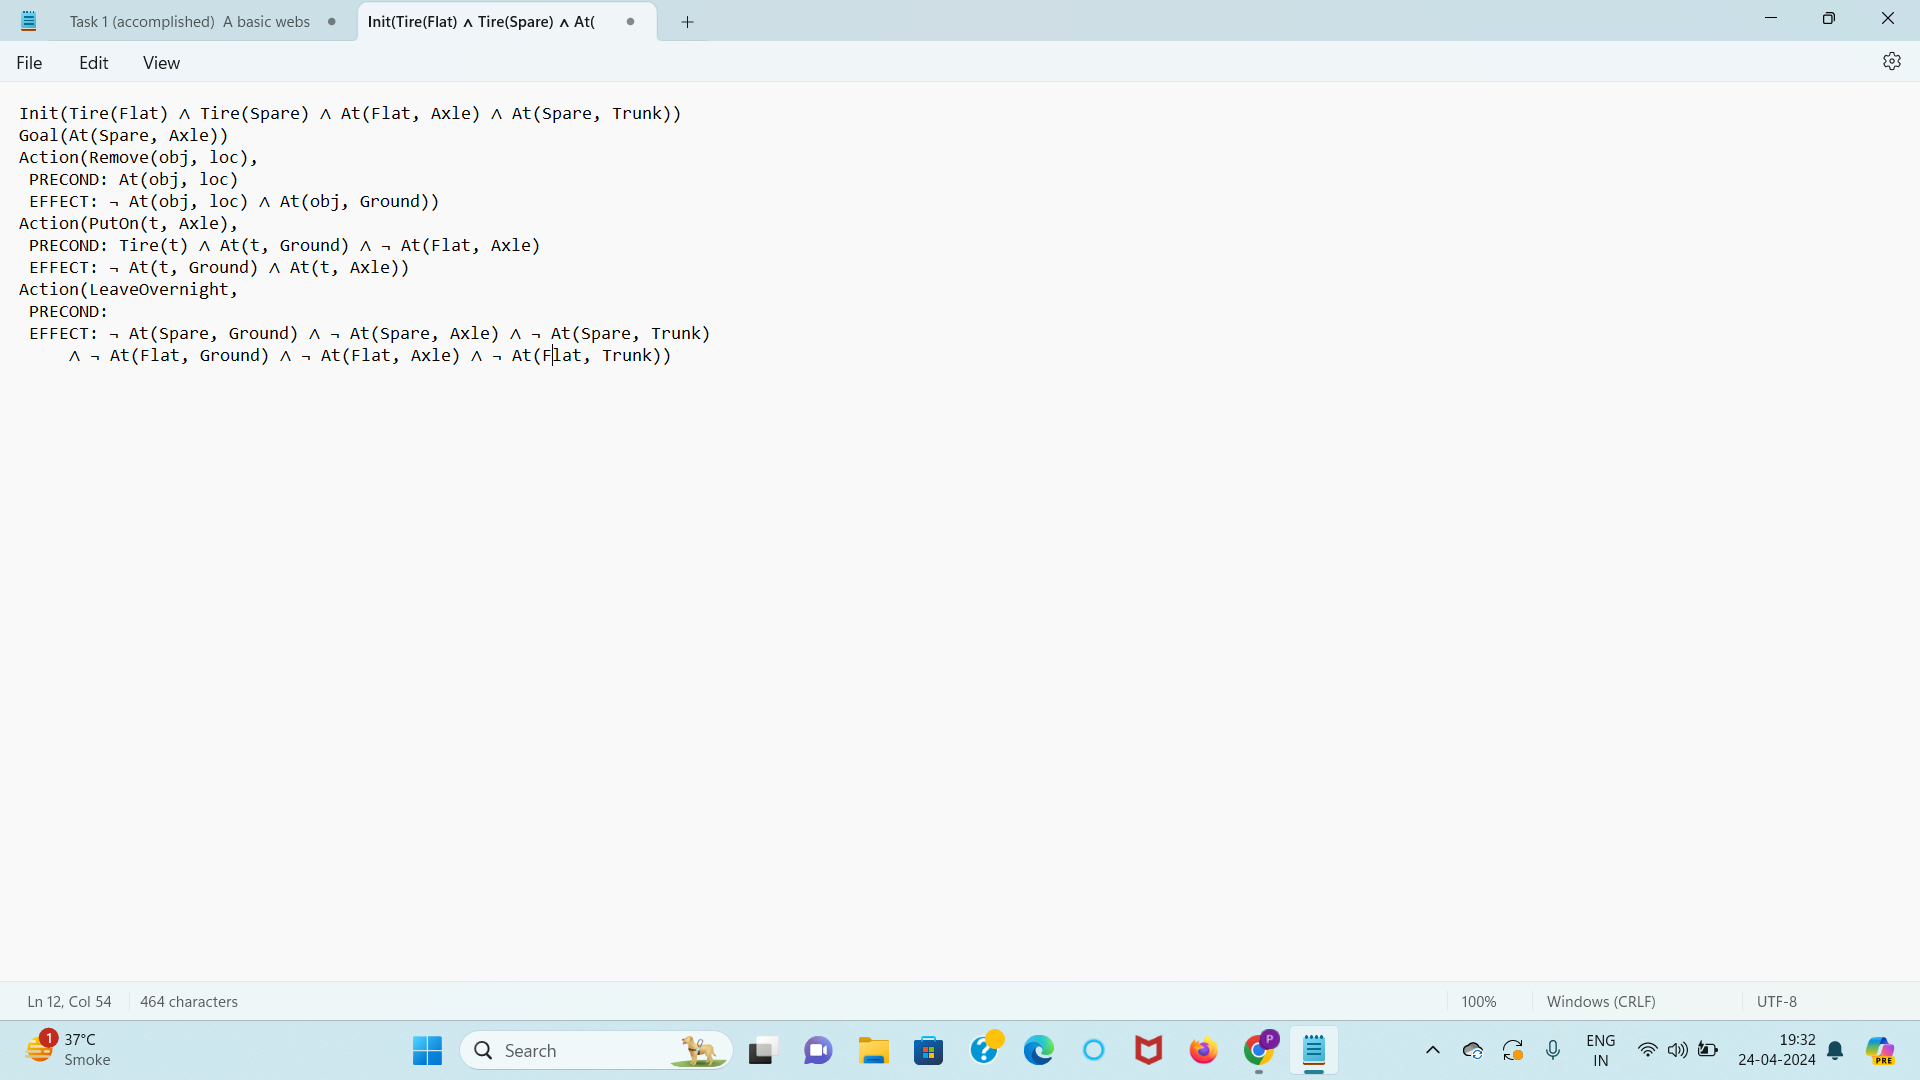

#ADL script for cargo plane airport problem

The problem can be defined with three actions: Load, Unload and Fly. The actions affect two predicates: In(c,p) means that cargo c is inside plane p, and At(x, a) means that object x (either plane or cargo) is at airport a. Note that cargo is not at anywhere when it is In a plane, so At really means "available for use at a given location." It takes some experience with action definitions to handle such details consistently.

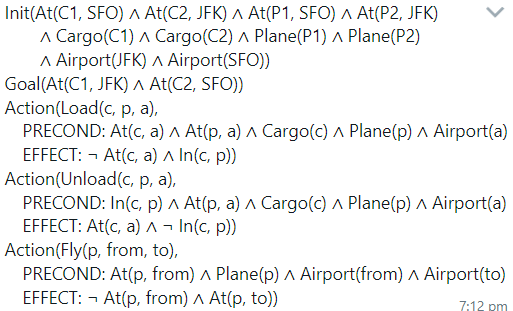

### A* Algortihm

The A* algorithm is a widely used graph traversal and pathfinding algorithm that efficiently finds the shortest path between nodes in a graph, typically in domains like artificial intelligence, robotics, and gaming. Here's a brief overview:

1. **Heuristic Search**: A* combines the advantages of Dijkstra's algorithm (uniform-cost search) and Greedy Best-First Search. It uses a heuristic function to estimate the cost of the cheapest path from the current node to the goal node.

2. **Evaluation Function**: A* maintains two lists: open and closed. It evaluates nodes based on a combination of the cost to reach the node from the start node (known) and the estimated cost to reach the goal node from the current node (heuristic). The evaluation function f(n) = g(n) + h(n), where g(n) is the actual cost to reach node n from the start, and h(n) is the heuristic cost estimation from n to the goal.

3. **Efficiency**: A* guarantees finding the shortest path if the heuristic is admissible (never overestimates the cost to reach the goal) and consistent (satisfies the triangle inequality). It prunes the search space efficiently by prioritizing nodes with lower f(n) values.

4. **Optimality and Completeness**: A* is both optimal (finds the shortest path) and complete (will always find a solution if one exists), given the right conditions and heuristic.

5. **Applications**: A* is widely used in various applications such as pathfinding in games, robotic motion planning, network routing, and more, where finding the shortest path is crucial.

Overall, the A* algorithm is a powerful and efficient technique for finding optimal paths in graphs, making it a cornerstone in many domains requiring intelligent navigation.

### 2.Genetic Algorithms--------------------------------------------------------
Sure, here are the basic steps of a Genetic Algorithm (GA):

1. **Initialization**: Create an initial population of individuals (possible solutions) randomly or using some heuristic method. Each individual represents a potential solution to the optimization problem.

2. **Evaluation**: Evaluate the fitness of each individual in the population. The fitness function quantifies how well an individual solves the problem. It could be a measure of how close the solution is to the optimal solution or how well it satisfies the problem constraints.

3. **Selection**: Select individuals from the current population to create a new population for the next generation. Individuals are selected with a probability proportional to their fitness. This step ensures that individuals with better fitness have a higher chance of being selected, thus improving the overall population's fitness over generations.

4. **Recombination (Crossover)**: Perform crossover or recombination to create offspring. This involves combining genetic information from selected parent individuals to produce new individuals (offspring) for the next generation. The crossover point and method can vary depending on the problem domain.

5. **Mutation**: Introduce random changes in the offspring population to maintain genetic diversity and explore new areas of the solution space. Mutation helps prevent premature convergence to suboptimal solutions and allows the algorithm to explore the search space more effectively.

6. **Replacement**: Replace the current population with the offspring population to form the next generation. The replacement strategy can vary, such as elitism (keeping the best individuals from the current population in the next generation) or generational replacement (replacing the entire population with the offspring).

7. **Termination**: Repeat steps 2 to 6 for a certain number of generations or until a termination condition is met. Termination conditions can include reaching a maximum number of generations, finding a satisfactory solution, or reaching a predefined fitness threshold.

8. **Solution Extraction**: Once the termination condition is met, extract the best individual(s) from the final population as the solution(s) to the optimization problem.

Genetic Algorithms mimic the process of natural selection and evolution to efficiently search for optimal solutions in complex search spaces, making them useful in various optimization and search problems across different domains.

### 3. Resolution steps--------------------------------------------------------

In the context of Artificial Intelligence (AI), the resolution steps for using a Genetic Algorithm (GA) to solve a problem are quite similar to the general steps outlined earlier. However, there may be specific considerations tailored to AI applications. Here's how you can adapt the steps for AI:

1. **Problem Formulation**: Define the problem in terms of an AI task, such as optimization, search, or learning. This could involve defining the state space, actions, and goal state for problems like search and planning, or specifying the input features, output classes, and evaluation metric for machine learning tasks.

2. **Representation**: Represent potential solutions, states, or individuals in the population using suitable data structures. For example, in a search problem, each individual could represent a candidate solution/state, while in a machine learning task, individuals could represent candidate solutions in the form of parameter vectors, neural network architectures, or feature subsets.

3. **Initialization**: Initialize the population of individuals using appropriate methods depending on the problem domain. For AI tasks, initialization methods could include random initialization, initialization based on prior knowledge or heuristics, or initialization inspired by domain-specific insights.

4. **Evaluation**: Evaluate the fitness or performance of each individual using suitable evaluation metrics or objective functions. In AI tasks, the fitness function could measure the quality of solutions based on their ability to achieve the desired task objectives, such as accuracy, reward, or utility.

5. **Selection**: Select individuals from the current population for reproduction based on their fitness. Consider selection methods that are suitable for AI tasks, such as fitness proportionate selection, tournament selection, or rank-based selection.

6. **Recombination (Crossover)**: Perform crossover or recombination to generate offspring solutions by combining genetic information from selected parent individuals. The crossover operators should be designed to preserve or improve desirable traits in the offspring, tailored to the problem domain and representation used.

7. **Mutation**: Introduce random changes or perturbations to the offspring solutions to explore new regions of the search space. Mutation operators should be designed to maintain diversity and prevent premature convergence, considering the specific characteristics of the problem and representation.

8. **Replacement**: Replace the current population with the offspring population to form the next generation. Consider replacement strategies that balance exploration and exploitation, such as elitism, steady-state replacement, or generational replacement.

9. **Termination**: Define termination conditions for the algorithm, such as reaching a maximum number of generations, convergence of the population, or achieving a satisfactory solution quality. Termination conditions should be adapted to the requirements and constraints of the AI task being solved.

10. **Solution Extraction**: Extract the best individual(s) from the final population as the solution(s) to the AI problem. Depending on the task, the solution could be a sequence of actions, a learned model, a set of parameters, or any other relevant output.

By adapting these resolution steps to the context of AI, Genetic Algorithms can be effectively applied to a wide range of tasks, including optimization, search, learning, and decision-making problems.

### 4. NLP Steps---------------------------------------------------------------

Certainly! Here's a brief overview of the basic steps of Natural Language Processing (NLP), covering lexical analysis, syntactic analysis, semantic analysis, discourse integration, and pragmatic analysis:

1. **Lexical Analysis**:
   - **Definition**: Lexical analysis involves breaking down the text into individual words or tokens, known as lexemes. This step includes tasks such as tokenization, stemming, and lemmatization.
   - **Tasks**:
     - Tokenization: Splitting the text into words, phrases, or symbols.
     - Stemming: Removing affixes from words to obtain their root form.
     - Lemmatization: Mapping words to their base or dictionary form.

2. **Syntactic Analysis**:
   - **Definition**: Syntactic analysis, also known as parsing, involves analyzing the grammatical structure of sentences to determine their syntax or grammar.
   - **Tasks**:
     - Parsing: Analyzing the syntactic structure of sentences to identify phrases, clauses, and relationships between words.
     - Part-of-speech tagging: Assigning grammatical categories (e.g., noun, verb, adjective) to each word in a sentence.
     - Dependency parsing: Identifying syntactic dependencies between words in a sentence.

3. **Semantic Analysis**:
   - **Definition**: Semantic analysis focuses on understanding the meaning of words, phrases, and sentences in context.
   - **Tasks**:
     - Word sense disambiguation: Resolving the ambiguity of word meanings based on context.
     - Named entity recognition: Identifying and classifying named entities such as people, organizations, and locations.
     - Semantic role labeling: Identifying the roles played by words in a sentence (e.g., agent, patient, theme).

4. **Discourse Integration**:
   - **Definition**: Discourse integration involves understanding how sentences or utterances relate to each other within a larger context or discourse.
   - **Tasks**:
     - Coreference resolution: Identifying and resolving references to the same entity across multiple sentences or documents.
     - Anaphora resolution: Resolving pronouns and other referring expressions to their antecedents.
     - Coherence modeling: Modeling the flow of information and coherence within a discourse or text.

5. **Pragmatic Analysis**:
   - **Definition**: Pragmatic analysis focuses on understanding the intended meaning of language beyond its literal interpretation, taking into account context, speaker intentions, and conversational implicature.
   - **Tasks**:
     - Speech act recognition: Identifying the illocutionary force or intended action behind an utterance (e.g., statement, question, request).
     - Conversational implicature: Inferring implied meaning or intentions from context and background knowledge.
     - Contextual analysis: Understanding how linguistic expressions are influenced by situational, social, and cultural factors.

These basic steps of NLP form the foundation for building more advanced language processing systems and applications, enabling computers to understand, generate, and interact with human language effectively.

### 1.Types of Learning---------------------------------------------------------
Sure, let's delve into each type of machine learning in more detail:

1. **Supervised Learning**:
   - In supervised learning, the algorithm learns from a labeled dataset, where each example consists of input features and corresponding output labels.
   - The goal is to learn a mapping function from input features to output labels, such that the model can make accurate predictions on unseen data.
   - Supervised learning tasks include classification, where the output is categorical, and regression, where the output is continuous.
   - Common algorithms include linear regression, logistic regression, decision trees, support vector machines (SVM), k-nearest neighbors (KNN), and neural networks.

2. **Unsupervised Learning**:
   - Unsupervised learning deals with unlabeled data, where the algorithm learns to find patterns or structure in the data without explicit guidance.
   - The goal is to uncover hidden relationships, group similar instances, or reduce the dimensionality of the data.
   - Unsupervised learning tasks include clustering, where similar data points are grouped together, and dimensionality reduction, where the number of input features is reduced while preserving important information.
   - Common algorithms include k-means clustering, hierarchical clustering, principal component analysis (PCA), and autoencoders.

3. **Semi-Supervised Learning**:
   - Semi-supervised learning utilizes both labeled and unlabeled data to improve model performance, especially when labeled data is limited or expensive to obtain.
   - The algorithm learns from a small amount of labeled data and a larger amount of unlabeled data, leveraging the additional unlabeled data to generalize better.
   - Semi-supervised learning algorithms often incorporate techniques from both supervised and unsupervised learning, such as self-training, co-training, or using generative models.
   - Applications include text and image classification, where labeled data is scarce, but large amounts of unlabeled data are available.

4. **Reinforcement Learning**:
   - Reinforcement learning involves training agents to interact with an environment in order to achieve a goal or maximize cumulative rewards.
   - The agent learns by taking actions in the environment, receiving feedback in the form of rewards or penalties, and updating its policy to improve future decision-making.
   - Reinforcement learning tasks include Markov Decision Processes (MDPs), where the agent observes states, takes actions, receives rewards, and transitions to new states.
   - Algorithms include Q-learning, Deep Q Networks (DQN), policy gradients, and actor-critic methods like Proximal Policy Optimization (PPO) and Deep Deterministic Policy Gradients (DDPG).

5. **Self-Supervised Learning**:
   - Self-supervised learning involves training models to predict certain parts of the input data from other parts of the same data, without relying on external labels.
   - The model learns meaningful representations or features from the data by solving pretext tasks, such as image inpainting, image colorization, or predicting missing words in a sentence.
   - Once trained, the model can be fine-tuned on downstream tasks with labeled data, often achieving better performance than models trained from scratch.
   - Self-supervised learning is particularly useful when labeled data is scarce or expensive to obtain, as it leverages the abundance of unlabeled data.

6. **Transfer Learning**:
   - Transfer learning involves transferring knowledge from a source task or domain to a target task or domain, thereby accelerating learning or improving performance in the target domain.
   - The idea is to leverage pre-trained models or features learned from large datasets in related tasks or domains and adapt them to new tasks with limited labeled data.
   - Transfer learning approaches include fine-tuning pre-trained models on target tasks, using features extracted from pre-trained models as input to task-specific models, or domain adaptation techniques to align distributions between source and target domains.
   - Transfer learning is widely used in computer vision, natural language processing, and other domains where labeled data is scarce or expensive.

These types of machine learning encompass a wide range of algorithms, techniques, and applications, each offering unique capabilities and advantages for solving different types of problems and addressing various challenges in AI and data science.

### 2. Types of Planning--------------------------------------------------------
Partial order planning and conditional planning are two approaches within the broader field of AI planning, each addressing specific challenges and requirements in planning problems. Let's discuss each of them:

1. **Partial Order Planning**:
   - **Description**: Partial order planning is a planning approach that allows for the flexibility of interleaving actions and reasoning about the order of actions without committing to a strict linear sequence of actions.
   - **Approach**: In partial order planning, the planner constructs a partial order plan, which is a directed acyclic graph (DAG) representing a set of actions and their dependencies. This graph captures the causal and temporal relationships between actions.
   - **Execution**: The execution of a partial order plan involves scheduling actions based on their dependencies and the available resources, while ensuring that the causal and temporal constraints are satisfied.
   - **Advantages**: Partial order planning offers flexibility and efficiency in handling concurrent actions, avoiding unnecessary commitments to a strict linear sequence, and accommodating uncertainty or changes in the environment.
   - **Algorithms**: Algorithms for partial order planning include Graphplan, SATPLAN, and more recently, techniques based on heuristic search and symbolic reasoning.
   - **Applications**: Partial order planning is used in domains where the order of actions is not completely determined in advance, such as robotics, scheduling, and process planning.

2. **Conditional Planning**:
   - **Description**: Conditional planning is a planning approach that deals with uncertain or incomplete information by considering conditional branches or alternative plans based on different possible outcomes or states of the environment.
   - **Approach**: In conditional planning, the planner generates a set of conditional plans, each representing a sequence of actions to achieve the goal under different conditions or assumptions about the environment.
   - **Execution**: During execution, the agent selects and executes the appropriate conditional plan based on the observed state of the environment or the outcome of previous actions.
   - **Advantages**: Conditional planning allows for robustness and adaptability in handling uncertainty and changing environments by considering multiple possible scenarios and planning accordingly.
   - **Algorithms**: Algorithms for conditional planning include decision-theoretic approaches such as Markov Decision Processes (MDPs), Partially Observable Markov Decision Processes (POMDPs), and probabilistic planning techniques.
   - **Applications**: Conditional planning is used in domains where the environment is uncertain or dynamic, such as autonomous systems, robotics, and decision-making under uncertainty.

Both partial order planning and conditional planning are important techniques in AI planning, offering solutions to different aspects of planning problems, including concurrency, uncertainty, and adaptability. By leveraging these approaches, planners can effectively handle a wide range of complex and dynamic environments in various application domains.

### 3. Characterstics of Environment--------------------------------------------
In the context of artificial intelligence (AI), the environment refers to the external system or context in which an intelligent agent operates and interacts. Understanding the characteristics of the environment is crucial for designing effective AI systems. Here are the key characteristics of an environment in AI:

1. **Observable vs. Partially Observable**:
   - **Observable Environment**: In an observable environment, the agent has complete and accurate information about the current state of the environment at any given time.
   - **Partially Observable Environment**: In a partially observable environment, the agent's knowledge about the environment is incomplete or uncertain. The agent may have limited perception or sensory capabilities, leading to uncertainty about the true state of the environment.

2. **Deterministic vs. Stochastic**:
   - **Deterministic Environment**: In a deterministic environment, the outcomes of actions are fully determined by the current state of the environment and the actions taken by the agent. There is no randomness or uncertainty in the environment dynamics.
   - **Stochastic Environment**: In a stochastic environment, the outcomes of actions are subject to randomness or uncertainty. Even with the same action taken in the same state, the environment's response may vary probabilistically.

3. **Static vs. Dynamic**:
   - **Static Environment**: In a static environment, the environment does not change over time in response to the agent's actions. The environment remains constant throughout the agent's decision-making process.
   - **Dynamic Environment**: In a dynamic environment, the environment may change over time, either autonomously or in response to the agent's actions. Changes could be due to external factors, other agents, or internal dynamics.

4. **Episodic vs. Sequential**:
   - **Episodic Environment**: In an episodic environment, the agent's interaction with the environment is divided into discrete episodes, with each episode having a clear beginning and end. Actions taken in one episode do not affect subsequent episodes.
   - **Sequential Environment**: In a sequential environment, the agent's actions have long-term consequences that influence future states and decisions. The agent's decisions are made over extended periods, and actions taken at one time step affect future states and outcomes.

5. **Discrete vs. Continuous**:
   - **Discrete Environment**: In a discrete environment, both the state space and action space are finite and discrete. The agent can perceive and manipulate individual discrete entities or symbols.
   - **Continuous Environment**: In a continuous environment, either the state space, action space, or both are continuous and infinite. The agent must deal with continuous-valued variables or parameters.

6. **Single-Agent vs. Multi-Agent**:
   - **Single-Agent Environment**: In a single-agent environment, there is only one intelligent agent operating in the environment, making decisions and taking actions to achieve its goals.
   - **Multi-Agent Environment**: In a multi-agent environment, there are multiple intelligent agents operating concurrently, each with its own goals, actions, and interactions with the environment. Interactions between agents can be cooperative, competitive, or a mix of both.

Understanding these characteristics helps AI designers and researchers choose appropriate algorithms, techniques, and architectures for building intelligent agents that can effectively operate and adapt to various types of environments. Additionally, it guides the development of strategies for decision-making, learning, and interaction in dynamic and uncertain settings.

### 4. Types of Sensors---------------------------------------------------------
In the context of artificial intelligence (AI), sensors play a crucial role in providing input data for AI systems to perceive and interact with their environment. Here are some common types of sensors used in AI applications along with their applications:

1. **Vision Sensors (Cameras)**:
   - **Application**: Vision sensors, such as cameras, capture visual data from the environment. They are widely used in AI applications for image recognition, object detection, facial recognition, gesture recognition, autonomous vehicles, surveillance systems, and augmented reality.

2. **Lidar (Light Detection and Ranging)**:
   - **Application**: Lidar sensors emit laser pulses and measure the time it takes for the pulses to return after hitting objects in the environment. They are used in AI applications for 3D mapping, environmental monitoring, autonomous navigation (e.g., in self-driving cars), robotics, and urban planning.

3. **Radar (Radio Detection and Ranging)**:
   - **Application**: Radar sensors emit radio waves and detect their reflections off objects in the environment. They are used in AI applications for object detection, collision avoidance systems in vehicles, weather monitoring, air traffic control, and surveillance systems.

4. **Ultrasonic Sensors**:
   - **Application**: Ultrasonic sensors emit high-frequency sound waves and measure the time it takes for the waves to bounce back after hitting objects. They are used in AI applications for distance measurement, obstacle detection in robotics, parking assistance systems, and industrial automation.

5. **Inertial Measurement Units (IMUs)**:
   - **Application**: IMUs consist of accelerometers and gyroscopes that measure acceleration and rotational motion, respectively. They are used in AI applications for motion tracking, gesture recognition, orientation estimation in drones and robots, virtual reality (VR) systems, and wearable devices.

6. **Microphones**:
   - **Application**: Microphones capture audio data from the environment. They are used in AI applications for speech recognition, voice assistants (e.g., Amazon Alexa, Google Assistant), acoustic event detection, sound classification, and noise monitoring.

7. **Pressure Sensors**:
   - **Application**: Pressure sensors measure air pressure, altitude, or fluid pressure. They are used in AI applications for weather forecasting, altitude estimation in drones and aircraft, depth sensing in underwater vehicles, and monitoring physiological parameters in medical devices.

8. **Temperature Sensors**:
   - **Application**: Temperature sensors measure ambient temperature. They are used in AI applications for climate control systems, environmental monitoring, thermal imaging, predictive maintenance in industrial equipment, and health monitoring.

9. **Biometric Sensors**:
   - **Application**: Biometric sensors capture physiological or behavioral characteristics for identity verification. They are used in AI applications for fingerprint recognition, iris recognition, facial recognition, voice recognition, and gait analysis for security and access control systems.

10. **Environmental Sensors**:
    - **Application**: Environmental sensors measure various parameters such as humidity, gas concentration, particulate matter, and pollution levels. They are used in AI applications for air quality monitoring, environmental sensing networks, smart buildings, and urban planning.

These sensors provide valuable input data for AI systems to perceive and understand their environment, enabling them to make informed decisions, learn from their surroundings, and interact intelligently with humans and other entities.


Q.1.
1. Learning
As its name suggests, Supervised machine learning is based on supervision. It means in the
supervised learning technique, we train the machines using the "labelled" dataset, and based
on the training, the machine predicts the output. Here, the labelled data specifies that some
of the inputs are already mapped to the output. More preciously, we can say; first, we train
the machine with the input and corresponding output, and then we ask the machine to
predict the output using the test dataset.
Ex. Suppose we have an input dataset of cats and dog images. So, first, we will provide the
training to the machine to understand the images, such as the shape & size of the tail of
cat and dog, Shape of eyes, colour, height (dogs are taller, cats are smaller), etc. After
completion of training, we input the picture of a cat and ask the machine to identify the
object and predict the output. Now, the machine is well trained, so it will check all the
features of the object, such as height, shape, colour, eyes, ears, tail, etc., and find that it's a
cat. So, it will put it in the Cat category

Training Phase:
During the training phase, the supervised learning algorithm analyzes the labeled training data to learn the underlying patterns or relationships between inputs and outputs.
The algorithm adjusts its internal parameters or model parameters based on the training data, using techniques such as optimization algorithms (e.g., gradient descent) to minimize the prediction error or loss function.
The goal of the training phase is to optimize the model's performance on the training data, such that it can generalize well to unseen data.

Types of Supervised Learning:
Supervised learning can be categorized into two main types: regression and classification.
1.	Regression:
2.	Classification:

Model Representation:
Commonly used models in supervised learning include linear regression, logistic regression, decision trees, support vector machines (SVM), naive Bayes, k-nearest neighbors (KNN), and neural networks.

2. Plannig

Hierarchical planning is a problem-solving approach in artificial intelligence (AI) that organizes planning tasks into multiple levels of abstraction, allowing for more efficient and structured planning. It aims to break down complex planning problems into manageable subproblems and then coordinate the solutions to these subproblems to achieve overall goals. Hierarchical planning provides a way to handle large-scale, complex problems by decomposing them into smaller, more tractable components.

Here's a detailed explanation of hierarchical planning:
Levels of Abstraction:
Hierarchical planning involves organizing planning tasks into multiple levels of abstraction, each representing different granularities of detail.
At higher levels of abstraction, plans are formulated at a more general or coarse-grained level, focusing on high-level goals and strategies.
At lower levels of abstraction, plans become more detailed and specific, addressing the finer-grained actions and constraints necessary for plan execution.
Decomposition:
The planning problem is decomposed into a hierarchy of subproblems, where each subproblem corresponds to a specific level of abstraction.
Decomposition involves breaking down the overall goal into subgoals and decomposing complex actions into simpler actions or subtasks.
This hierarchical decomposition creates a structured framework for planning, making it easier to manage and reason about the problem.
Example :
Planning a vacation includes sub goals such as book flight accommodation ,activities and  each of which can further be broken down into smaller parts



### Converting statements in predicate logic
Converting statements into predicate logic, also known as logical or predicate notation, is a fundamental process in artificial intelligence for representing knowledge and reasoning about the world. In predicate logic, statements are expressed using predicates, variables, quantifiers, and logical connectives. Here's how statements are converted into predicate logic:

1. **Identify Predicates**:
   - Predicates represent properties, relationships, or actions in the domain of discourse. Identify the predicates that are relevant to the statement and assign them appropriate symbols. For example, "is a student," "loves," "is taller than," etc.

2. **Define Variables**:
   - Variables represent objects or individuals in the domain of discourse. Introduce variables to represent the entities mentioned in the statement. Use different variables for different objects. For example, \(x, y, z\) represent individuals, \(p, q, r\) represent properties, etc.

3. **Express Quantification**:
   - Use quantifiers to express the scope of the statement.
     - Universal quantifier (∀) represents "for all" or "for every." It asserts that a property holds true for all individuals in the domain.
     - Existential quantifier (∃) represents "there exists." It asserts that there is at least one individual in the domain for which a property holds true.
   - Place quantifiers before predicates to indicate the scope of the quantification. For example, \(\forall x\) represents "for all \(x\)," and \(\exists y\) represents "there exists \(y\)."

4. **Apply Logical Connectives**:
   - Use logical connectives (AND, OR, NOT, IMPLIES, etc.) to express logical relationships between predicates.
   - Conjunction (AND) is represented by ∧.
   - Disjunction (OR) is represented by ∨.
   - Negation (NOT) is represented by ¬.
   - Implication (IF...THEN) is represented by →.
   - Biconditional (IF AND ONLY IF) is represented by ↔.

5. **Combine Predicates and Variables**:
   - Combine predicates, variables, quantifiers, and logical connectives to form the predicate logic expression that represents the original statement.
   - Ensure that the resulting expression accurately captures the meaning of the statement in the domain of discourse.

Here's an example of converting a statement into predicate logic:

Statement: "All cats are mammals."

Predicate: \(C(x)\): \(x\) is a cat.
Predicate: \(M(x)\): \(x\) is a mammal.

Predicate Logic Representation:
\[
\forall x (C(x) \rightarrow M(x))
\]

This predicate logic expression states that for all \(x\), if \(x\) is a cat (\(C(x)\)), then \(x\) is a mammal (\(M(x)\)).

### Performing alpha beta cut off solving
#### Theory
Alpha-beta pruning is a technique used to reduce the number of nodes evaluated in the minimax algorithm, which is commonly used in game-playing AI systems. It works by eliminating subtrees that are guaranteed to be worse than the current best choice, thus reducing the number of nodes that need to be explored. Here's how alpha-beta cut-off is performed in AI:

1. **Minimax Algorithm**:
   - Alpha-beta cut-off is typically used in conjunction with the minimax algorithm, which is a recursive algorithm used to determine the best move for a player in a two-player, zero-sum game.
   - In minimax, the algorithm recursively explores the game tree, alternating between maximizing the score for the current player (maximizing player) and minimizing the score for the opponent (minimizing player).

2. **Alpha and Beta Values**:
   - During the search, two values, alpha and beta, are passed down the tree. Alpha represents the best value found so far for the maximizing player, while beta represents the best value found so far for the minimizing player.
   - Initially, alpha is set to negative infinity, and beta is set to positive infinity.

3. **Pruning**:
   - As the search progresses, nodes are evaluated, and the alpha and beta values are updated accordingly.
   - At each node, if the algorithm finds a move that guarantees a score worse than the current best move, it can prune the subtree rooted at that node. This is because the opponent will never choose that move, as it is worse than a move already considered.
   - Specifically, if the current node is a maximizing node and the value found is greater than or equal to beta, or if the current node is a minimizing node and the value found is less than or equal to alpha, then pruning occurs.

4. **Recursive Search**:
   - The search continues recursively, with alpha and beta values being updated and passed down the tree.
   - The algorithm explores branches of the tree until either a terminal node (leaf) is reached or the search is pruned due to alpha-beta cut-off.

5. **Efficiency**:
   - Alpha-beta pruning significantly reduces the number of nodes that need to be evaluated compared to a standard minimax search, especially in large game trees.
   - By eliminating branches that cannot possibly affect the final decision, alpha-beta pruning improves the efficiency of the search algorithm, allowing for deeper searches within the same computational resources.

Overall, alpha-beta cut-off is a powerful optimization technique in AI that allows for more efficient exploration of game trees in adversarial environments.

#### Example
Let's consider a simple example of applying the alpha-beta pruning technique in the minimax algorithm for a two-player, zero-sum game, such as tic-tac-toe.

Suppose we have the following game tree for tic-tac-toe:

```
       Max
      /   |   \
  Min   Min   Min
 / | \ / | \ / | \
T   T  T T  T T  T
```

In this game tree:
- "Max" represents the maximizing player (e.g., X), who wants to maximize the score.
- "Min" represents the minimizing player (e.g., O), who wants to minimize the score.
- "T" represents terminal nodes (leaf nodes) where the game ends, either in a win, loss, or draw.

Let's assign scores to the terminal nodes:
- If Max wins, score = +1.
- If Min wins, score = -1.
- If it's a draw, score = 0.

We start with initial values for alpha and beta:
- alpha = -∞ (initially)
- beta = +∞ (initially)

Now, let's perform the alpha-beta pruning algorithm:

1. **Max node (root)**:
   - Evaluate the left child node (Min) with alpha = -∞ and beta = +∞.
   - Move to the right child node (Min).

2. **Min node**:
   - Evaluate the left child node (Min) with alpha = -∞ and beta = +∞.
   - The score for this node is -1. Update beta to -1.
   - Evaluate the middle child node (Min) with alpha = -∞ and beta = -1.
   - Since the score for this node is -1, update beta to -1 (no change).
   - Evaluate the right child node (Min) with alpha = -∞ and beta = -1.
   - The score for this node is -1. Update beta to -1 (no change).
   - Since the score for this node is -1, prune the subtree rooted at this node because it will not affect the final decision.

3. **Back to Max node (root)**:
   - The score for the left child (Min) is -1.
   - Evaluate the middle child node (Min) with alpha = -∞ and beta = -1.
   - Since the score for this node is -1, update beta to -1 (no change).
   - Evaluate the right child node (Min) with alpha = -∞ and beta = -1.
   - The score for this node is -1. Update beta to -1 (no change).
   - Since the score for this node is -1, prune the subtree rooted at this node because it will not affect the final decision.

In this example, the right child node of the root (Max) can be pruned, as it does not affect the final decision. This demonstrates how alpha-beta pruning efficiently prunes subtrees that cannot possibly affect the final decision, leading to a more efficient search algorithm.